In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Checking Duplicate rows
df.duplicated().sum()

0

In [7]:
# Dropping not so useful columns
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [12]:
# One Hot Encoding Categorical columns
df = pd.get_dummies(data=df, columns=['Geography','Gender'],dtype=int, drop_first=True)

In [15]:
# Separating input and output columns
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [17]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.51577623,  0.67334015, -0.69845797, ..., -0.58158423,
        -0.58100686, -1.10219754],
       [ 1.93077967, -0.37403025, -1.7397669 , ...,  1.7194414 ,
        -0.58100686,  0.90727838],
       [ 1.35024098, -0.56446124, -0.69845797, ..., -0.58158423,
         1.72115008,  0.90727838],
       ...,
       [ 1.93077967, -0.75489222,  1.3841599 , ..., -0.58158423,
         1.72115008,  0.90727838],
       [ 1.48500889, -0.56446124,  1.03705692, ..., -0.58158423,
         1.72115008,  0.90727838],
       [ 0.72823525,  0.19726269, -1.04556094, ..., -0.58158423,
        -0.58100686,  0.90727838]])

In [21]:
# Importing DL libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-22 18:36:08.388912: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history = model.fit(X_train_scaled, y_train, batch_size=50, epochs=100, validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8659 - loss: 0.3267 - val_accuracy: 0.8594 - val_loss: 0.3430
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.3167 - val_accuracy: 0.8625 - val_loss: 0.3428
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8679 - loss: 0.3283 - val_accuracy: 0.8606 - val_loss: 0.3419
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.3276 - val_accuracy: 0.8631 - val_loss: 0.3451
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8690 - loss: 0.3175 - val_accuracy: 0.8637 - val_loss: 0.3430
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8703 - loss: 0.3209 - val_accuracy: 0.8612 - val_loss: 0.3433
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.3255 - val_accuracy: 0.8637 - val_loss: 0.3429
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8738 - loss: 0.3225 - val_accu

In [33]:
history.history

{'accuracy': [0.8687499761581421,
  0.8696874976158142,
  0.8678125143051147,
  0.8687499761581421,
  0.8690624833106995,
  0.8693749904632568,
  0.8687499761581421,
  0.870312511920929,
  0.8682812452316284,
  0.8681250214576721,
  0.8690624833106995,
  0.867968738079071,
  0.8687499761581421,
  0.8676562309265137,
  0.8687499761581421,
  0.8695312738418579,
  0.8693749904632568,
  0.8685937523841858,
  0.8690624833106995,
  0.8700000047683716,
  0.8693749904632568,
  0.8676562309265137,
  0.8687499761581421,
  0.8693749904632568,
  0.8690624833106995,
  0.8695312738418579,
  0.8690624833106995,
  0.8689062595367432,
  0.8695312738418579,
  0.8689062595367432,
  0.8685937523841858,
  0.8693749904632568,
  0.8689062595367432,
  0.8684375286102295,
  0.8704687356948853,
  0.8692187666893005,
  0.8696874976158142,
  0.8687499761581421,
  0.8681250214576721,
  0.8690624833106995,
  0.8701562285423279,
  0.8689062595367432,
  0.8682812452316284,
  0.8692187666893005,
  0.8689062595367432,


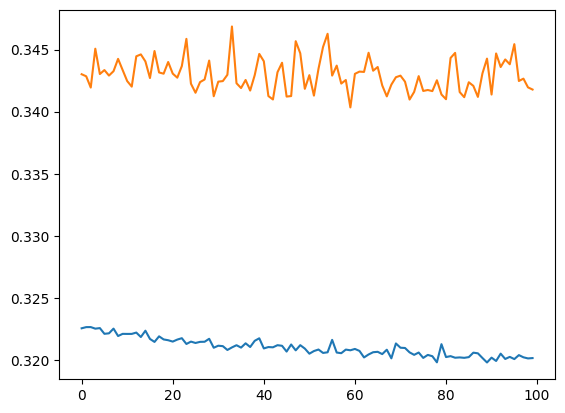

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

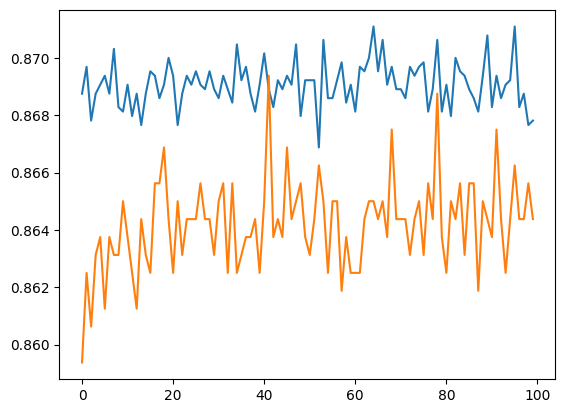

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [40]:
y_prop = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
y_pred = np.where(y_prop>0.5,1,0)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.85